# Visual method to estimate the correct value of ultrametric sequence hyperparameters

Notebook to explore hyper-parameters and select a temperature and a block size for random blocks which have roughly equivalent dataset exploration

## Sequence parameters

In [51]:
T = 0.2
split_length = [1000]
tree_depth = 3 #3 for MNIST
tree_branching = 2 #other values not supported yet
seq_length = 600000
test_nbr = 10 

## Sequence generation 

Generate the sequence necessary for HP exploration: an ultrametric sequence and a random blocks sequence

In [52]:
import os
import matplotlib.pyplot as plt
import random
nwd = '/Users/Antonin/Documents/Documents/ENS 2A/Stage M1/Code/github/Ultrametric-benchmark'
os.chdir(nwd)
from trainer import Trainer
from dataset import Dataset

In [53]:
mnist_ds = Dataset(data_origin='MNIST')
trainer_um = Trainer(dataset=mnist_ds, network='network', training_type='ultrametric',
                    memory_sampling='reservoir sampling', memory_sz=10, sequence_length=seq_length,
                    energy_step=1, T=T, split_length_list=split_length, batch_sz=10)
trainer_rb = Trainer(dataset=mnist_ds, network='network', training_type='random_blocks2',
                    memory_sampling='reservoir sampling', memory_sz=10, sequence_length=seq_length,
                    energy_step=1, T=T, split_length_list=split_length, batch_sz=10)

Generate the digits sequences for both cases

In [54]:
trainer_um.make_train_sequence()
trainer_rb.make_train_sequence()


Transition rates vector : [0.00000000e+00 9.93262357e-01 3.34627456e-03 3.34627456e-03
 1.12735103e-05 1.12735103e-05 1.12735103e-05 1.12735103e-05]


## Plot labels history

In [55]:
def lbl_history(seq, T_list, shuffled_blocksz=None, strides=None):
    n_Ts = len(T_list)
    assert (n_Ts>0)
    t_explr = None

    lbls_fig = plt.figure(figsize=(18,10*n_Ts))
    lbls_axes = []

    for T_id, T in enumerate(T_list):
        if shuffled_blocksz is None:
            occur_id = random.randint(0, len(seq)-1)
        else:
            occur_id = random.randint(0, len(self.train_labels_shfl[T][shuffled_blocksz])-1)
            seq = self.train_labels_shfl[T][shuffled_blocksz][occur_id]

        n_labels = len(set(seq))
        lbls_ax = plt.subplot(n_Ts, 1, 1+T_id)
        lbls_axes.append(lbls_ax)
        lbls_ax.plot(seq)

        obs_lbl_set = set()
        nobs_seq = []
        for itr_id, lbl in enumerate(seq):
            obs_lbl_set.add(lbl)
            nobs_seq.append(len(obs_lbl_set))
            if t_explr is None and len(obs_lbl_set) == n_labels:
                t_explr = itr_id

        lbls_ax.plot(nobs_seq)
        if strides is not None:
            for stride in strides:
                lbls_ax.axvline(x=stride, ymin=0, ymax=n_labels)

        ttl = 'History of labels in the original training sequence - T='+str(T)
        if t_explr:
            ttl = ttl+' - tau_asym=' + str(t_explr)
    plt.show()
    return lbls_fig, lbls_axes

Plot the Ultrametric sequence and the history of visited labels

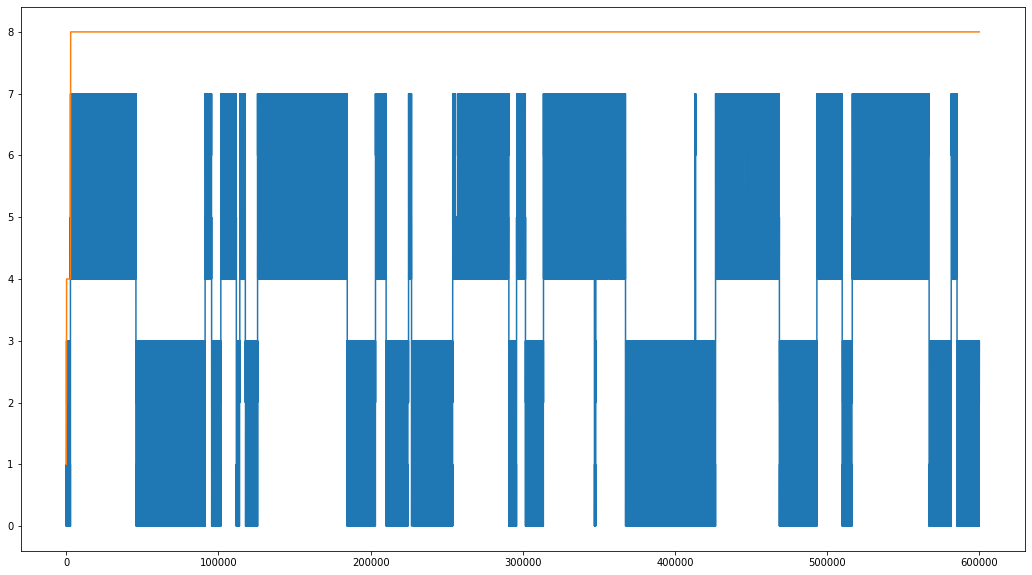

(<Figure size 1296x720 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x2a188a018d0>])

In [56]:
lbl_history(trainer_um.train_sequence, [T]) 

Plot the Random Blocks sequence and the history of visited labels

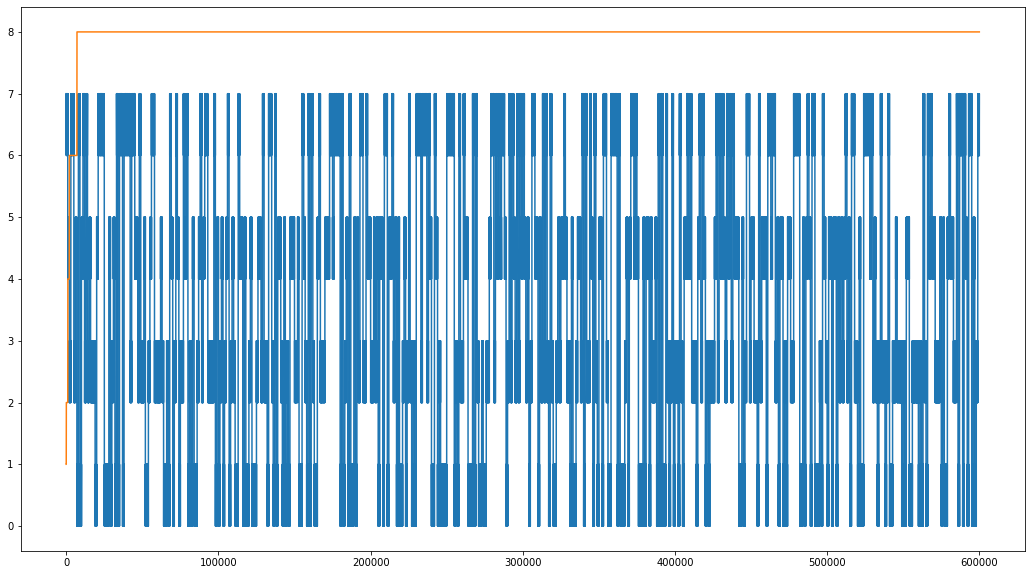

(<Figure size 1296x720 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x2a18ad644a8>])

In [57]:
lbl_history(trainer_rb.train_sequence, [T]) 

## Testing network accuracy

To make sure the temperature is correct, need to check that the network trained on the UM sequence reaches asymptotique accurary sensibly before the end of the training

In [58]:
import neuralnet
from ultrametric_analysis import ultrametric_analysis

In [59]:
net = neuralnet.Net_FCL(dataset=mnist_ds, hidden_size=256)
trainer_um.network = net
trainer_um.network_orig = net
trainer_um.network_shfl = net

In [60]:
class Argument: 
    def __init__(self, verbose, test_nbr, test_stride, lr, sequence_type, enable_shuffling): 
        self.verbose = verbose
        self.test_nbr = test_nbr
        self.test_stride = test_stride
        self.lr = lr 
        self.sequence_type = sequence_type
        self.enable_shuffling = enable_shuffling
      
test_stride = int(seq_length/test_nbr)
args = Argument(verbose=1, test_nbr=test_nbr, test_stride=test_stride, lr=0.01, 
                sequence_type="ultrametric", enable_shuffling=False)

In [61]:
rs = ultrametric_analysis(trainer_um, args, [])

Data generation...
Transition rates vector : [0.00000000e+00 9.93262357e-01 3.34627456e-03 3.34627456e-03
 1.12735103e-05 1.12735103e-05 1.12735103e-05 1.12735103e-05]
...done

[1000] loss: 0.1141
[2000] loss: 0.1522
[3000] loss: 0.0656
[4000] loss: 0.0749
[5000] loss: 0.0650
[6000] loss: 0.0544
--- Finished Experience Replay training on (0, 60000) ---
Accuracy of the network on the 7136 test images: 66.05%
[7000] loss: 0.0845
[8000] loss: 0.0733
[9000] loss: 0.0544
[10000] loss: 0.0588
[11000] loss: 0.0573
[12000] loss: 0.0488
--- Finished Experience Replay training on (60000, 120000) ---
Accuracy of the network on the 7136 test images: 71.92%
[13000] loss: 0.0524
[14000] loss: 0.0498
[15000] loss: 0.0413
[16000] loss: 0.0605
[17000] loss: 0.0710
[18000] loss: 0.0650
--- Finished Experience Replay training on (120000, 180000) ---
Accuracy of the network on the 7136 test images: 73.28%
[19000] loss: 0.0744
[20000] loss: 0.0576
[21000] loss: 0.0446
[22000] loss: 0.0495
[23000] loss: 0.0